# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Dataset

In [2]:
dataset=pd.read_csv('diabetes_prediction_dataset.csv')
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [5]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

checking correlation

In [7]:
dataset.corr()

<ipython-input-7-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


checking value counts for sampling

In [8]:
dataset['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [9]:
dataset['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [10]:
dataset['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

# Visualization of relations

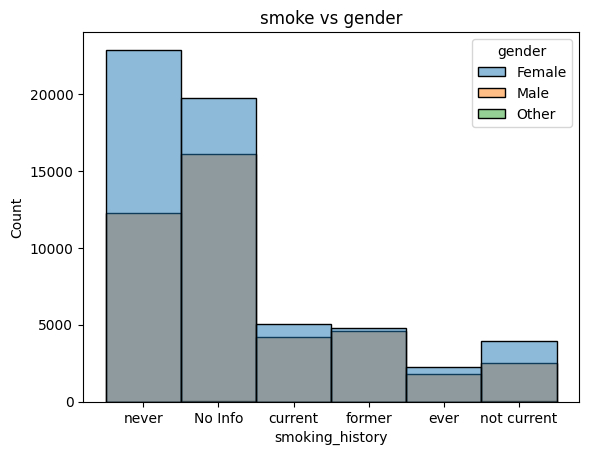

In [11]:
sns.histplot(x='smoking_history',hue='gender',data=dataset)
plt.title('smoke vs gender')
plt.show()

In [ ]:
sns.barplot(x='bmi',y='age',data=dataset)
plt.title('bmi vs age')
plt.show()

In [ ]:
sns.barplot(x='blood_glucose_level',y='age',hue='gender',data=dataset)
plt.title('bmi vs age')
plt.show()

# Sampling unbalanced data

In [14]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]
sampler= RandomOverSampler(random_state=42)
x_resampled, y_resampled = sampler.fit_resample(x, y)
balanced_dataset = pd.concat([x_resampled, y_resampled], axis=1)
val=balanced_dataset['diabetes'].value_counts()
print('after balancing label column value count')
val

after balancing label column value count


0    91500
1    91500
Name: diabetes, dtype: int64

In [15]:
balanced_dataset.shape

(183000, 9)

In [16]:
dataset.shape

(100000, 9)

In [17]:
balanced_dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [18]:
balanced_dataset['smoking_history'].value_counts()

never          67679
No Info        50082
former         24815
current        18631
not current    13196
ever            8597
Name: smoking_history, dtype: int64

In [19]:
balanced_dataset['smoking_history'].replace("No Info","never",inplace=True)

In [20]:
balanced_dataset['smoking_history'].value_counts()

never          117761
former          24815
current         18631
not current     13196
ever             8597
Name: smoking_history, dtype: int64

In [21]:
for i in balanced_dataset.columns:
  print(i,balanced_dataset[i].value_counts())

gender Female    102066
Male       80916
Other         18
Name: gender, dtype: int64
age 80.00    15558
62.00     3972
57.00     3802
61.00     3775
66.00     3575
         ...  
1.00        83
0.48        83
0.40        66
0.16        59
0.08        36
Name: age, Length: 102, dtype: int64
hypertension 0    154785
1     28215
Name: hypertension, dtype: int64
heart_disease 0    166623
1     16377
Name: heart_disease, dtype: int64
smoking_history never          117761
former          24815
current         18631
not current     13196
ever             8597
Name: smoking_history, dtype: int64
bmi 27.32    40385
26.95      224
29.60      216
28.45      216
26.25      211
         ...  
63.55        1
48.44        1
63.15        1
48.34        1
60.52        1
Name: bmi, Length: 4247, dtype: int64
HbA1c_level 5.7    15296
6.6    15253
5.8    14656
6.0    14649
6.2    14569
6.1    14369
6.5    14312
3.5     7662
4.8     7597
4.5     7585
4.0     7542
5.0     7471
8.2     7151
8.8     7064
9.0 

# Encoding

In [22]:
label_encoder = LabelEncoder()
balanced_dataset['gender'] = label_encoder.fit_transform(balanced_dataset['gender'])
balanced_dataset['smoking_history'] = label_encoder.fit_transform(balanced_dataset['smoking_history'])

In [23]:
balanced_dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,3,27.32,6.6,85,0
6,0,44.0,0,0,3,19.31,6.5,200,1
7,0,79.0,0,0,3,23.86,5.7,85,0
8,1,42.0,0,0,3,33.64,4.8,145,0
9,0,32.0,0,0,3,27.32,5.0,100,0


# Splitting Dataset into x,y

In [24]:
x=balanced_dataset.iloc[:,0:-1]
y=balanced_dataset.iloc[:,-1]

# Splitting into Train and Test set

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Training the model on the Training set and Predicting the result on test set

In [26]:
accuracy1=[]

classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(x_train, y_train)
y_pred = classifier1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy1.append(accuracy)


classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(x_train, y_train)
y_pred = classifier2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy1.append(accuracy)

classifier5 = GaussianNB()
classifier5.fit(x_train, y_train)
y_pred = classifier5.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy1.append(accuracy)


classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(x_train, y_train)
y_pred = classifier6.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy1.append(accuracy)


classifier7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier7.fit(x_train, y_train)
y_pred = classifier7.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy1.append(accuracy)

classifier8 = XGBClassifier()
eval_set = [(x_test, y_test)]
classifier8.fit(x_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
y_pred = classifier8.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy1.append(accuracy)


#models
model=['LogisticRegression','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
dic1={'model':model,'accuracy':accuracy1}
modelss=pd.DataFrame(dic1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]	validation_0-error:0.10673


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-error:0.10411
[2]	validation_0-error:0.09963
[3]	validation_0-error:0.09878
[4]	validation_0-error:0.09803
[5]	validation_0-error:0.09834
[6]	validation_0-error:0.09797
[7]	validation_0-error:0.09504
[8]	validation_0-error:0.09482
[9]	validation_0-error:0.09357
[10]	validation_0-error:0.09322
[11]	validation_0-error:0.09290
[12]	validation_0-error:0.08831
[13]	validation_0-error:0.08721
[14]	validation_0-error:0.08708
[15]	validation_0-error:0.08586
[16]	validation_0-error:0.08540
[17]	validation_0-error:0.08463
[18]	validation_0-error:0.08457
[19]	validation_0-error:0.08424
[20]	validation_0-error:0.08433
[21]	validation_0-error:0.08428
[22]	validation_0-error:0.08393
[23]	validation_0-error:0.08363
[24]	validation_0-error:0.08354
[25]	validation_0-error:0.08345
[26]	validation_0-error:0.08317
[27]	validation_0-error:0.08267
[28]	validation_0-error:0.08291
[29]	validation_0-error:0.08227
[30]	validation_0-error:0.08168
[31]	validation_0-error:0.08188
[32]	validation_0

# Predicted Accuracy

In [27]:
modelss

,model,accuracy
0,LogisticRegression,0.884284
1,KNeighborsClassifier,0.954667
2,GaussianNB,0.838907
3,DecisionTreeClassifier,0.983847
4,RandomForestClassifier,0.990055
5,XGBClassifier,0.937290


In [28]:
modelss["accuracy"].tolist()

[0.8842841530054645,
 0.9546666666666667,
 0.8389071038251366,
 0.9838469945355192,
 0.9900546448087432,
 0.9372896174863388]

# Visualizing the Accuracy between the Models

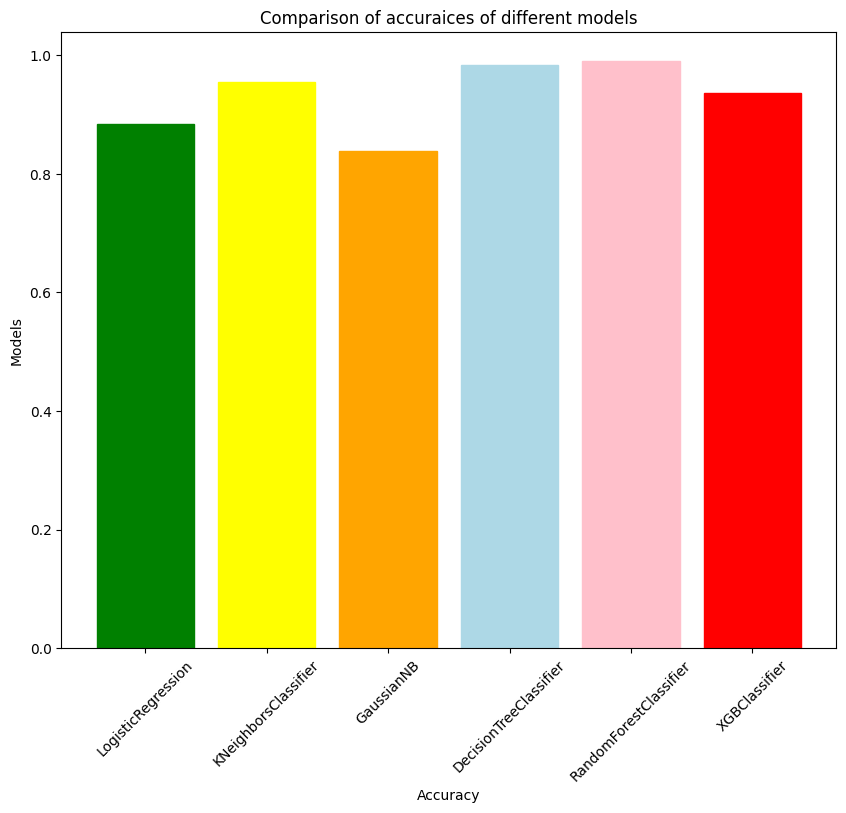

In [29]:
model=['LogisticRegression','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
acc = modelss["accuracy"].tolist()
plt.figure(figsize=(10,8))
graph = plt.bar(model,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xticks(rotation=45)
plt.title("Comparison of accuraices of different models")
graph[0].set_color('green')
graph[1].set_color('yellow')
graph[2].set_color('orange')
graph[3].set_color('lightblue')
graph[4].set_color('pink')
graph[5].set_color('red')



In [30]:
p=classifier7.predict([[0,44.0,0,0,3,19.31,6.5,200]])
p

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])